# Mapping the probability distribution of Hydrogen atom in 2D

In [1]:
import numpy as np
import sympy as sym
import scipy.special as ss

import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from IPython.display import clear_output, display

In [56]:
out = './out/'
figsave_format = 'pdf'
figsave_dpi = 200

colors = [
    'tab:red',
    'tab:orange',
    'tab:green',
    'tab:blue',
    'tab:purple'
]

# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

# Seaborn style settings
seaborn_cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)

sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

## Physical constans

In [57]:
# 1. Reduced Planck's constant [J s]
hbar = 1.054571817e-34
# 2. Vacuum permittivity [F] = [C^2 J^-1]
eps_0 = 8.8541878128e-12
# 3. Rest mass of electron [kg]
m_e = 9.1093837015e-31
# 4. Rest mass of proton [kg]
m_p = 1.67262192369e-27
# 5. Reduced mass of e-p system
mu = 1/(1/m_e + 1/m_p)
# 6. Elementary charge [C]
q_e = 1.602176634e-19

# 7. (Derived from others) Reduced Bohr radius [m]
a_0 = 4 * np.pi * eps_0 * hbar**2 / (mu * q_e**2)

## Generalized Laguerre polynomial

For arbitrary real $\alpha$ the polynomial solutions of the differential equation

$$
x y'' + \left( 1 + \alpha - x \right) y' + ny = 0
$$
are called generalized Laguerre polynomials. One can also define the generalized Laguerre polynomials recursively, defining the first two polynomials as

$$
L_{0}^{\alpha} \left( x \right) = 1
$$
$$
L_{1}^{\alpha} \left( x \right) = 1 + \alpha - x
$$
and then using the following recurrence relation for any $k \geq 1$:

$$
L_{k+1}^{\alpha} \left( x \right)
=
\frac{\left( 2k + 1 + \alpha - x \right) L_{k}^{\alpha} \left( x \right) - \left( k + \alpha \right) L_{k-1}^{\alpha} \left( x \right)}{k + 1}
$$

In [86]:
def laguerre(X, alpha, n):
    
    if n == 0:
        return np.ones_like(X)
    elif n == 1:
        return 1 + alpha - X
    else:
        # Here we calculate the n-th Laguerre polynomial
        # The 'n' input parameter thus becomes 'k+1' in the equation above
        # This means, that:
        #   - k+1 := n
        #   - k   := n-1
        #   - k-1 := n-2
        return (
          (2 * (n-1) + 1 + alpha - X) * laguerre(X, alpha, (n-1)) \
          - ((n-1) + alpha) * laguerre(X, alpha, (n-2))
        )/n

## Associated Legendre polynomials

The canonical solutions of the general Legendre equation

$$
\frac{d}{dx}
\left[
    \left( 1 - x^{2} \right) \frac{d}{dx} P_{l}^{m} \left( x \right)
\right]
+
\left[
    l \left( l + 1 \right) - \frac{m^{2}}{1 - x^{2}} P_{l}^{m} \left( x \right)
\right]
=
0
$$

are called the associated Legendre polynomials. One can give an arbitrary Legendre polynomial $P_{l}^{m} \left( x \right)$ with non-negative integer $l$ and $m$, where $0 \geq m geq l$ in terms of derivatives of ordinary Legendre polynomials:

$$
P_{l}^{m} \left( x \right)
=
\left( -1 \right)^{m} \left( 1 - x^{2} \right)^{m/2} \frac{d^{m}}{dx^{m}} \left[ P_{l} \left( x \right) \right]
$$

Since the Rodrigues' formula states, that the ordinary Legendre polynomial is

$$
P_{l} \left( x \right)
=
\frac{1}{2^{l} l!} \frac{d^{l}}{dx^{l}} \left[ \left( x^{2} - 1 \right)^{l} \right]
$$

the equation for the associated Legendre polynomials could be reshaped as

$$
P_{l}^{m} \left( x \right)
=
\frac{\left( -1 \right)^{m}}{2^{l} l!}
\left( 1 - x^{2} \right)^{m/2} \frac{d^{m+l}}{dx^{m+l}} \left[ \left( x^{2} - 1 \right)^{l} \right]
$$

The definition of associated Legendre polynomials could be extended to negative values of $m$:

$$
P_{l}^{-m} \left( x \right)
=
\left( -1 \right)^{m} \frac{\left( l - m \right)!}{\left( l + m \right)!} P_{l}^{m} \left( x \right)
$$
Thus $m$ could take the integer values, where $-l \leq m \leq l$.

In [71]:
X_laguerre = np.arange(-10,10,1e-02)

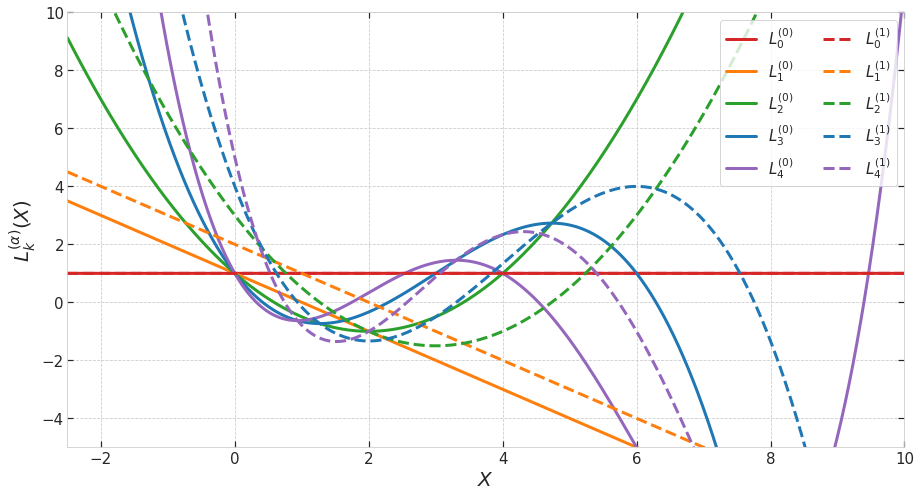

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

axisticksize = 15
axislabelsize = 20
axislegendsize = 15

for k in range(0,5):
    L = laguerre(X_laguerre, alpha=0.0, n=k)
    axes.plot(X_laguerre, L, label='$L_{%d}^{(%d)}$' % (k, 0),
              lw=3, c=colors[k])
for k in range(0,5):
    L = laguerre(X_laguerre, alpha=1.0, n=k)
    axes.plot(X_laguerre, L, label='$L_{%d}^{(%d)}$' % (k, 1),
              lw=3, ls='--', c=colors[k])

axes.set_xlim(-2.5,10)
axes.set_ylim(-5,10)

axes.set_xlabel('$X$', fontsize=axislabelsize)
axes.set_ylabel('$L_{k}^{(\\alpha)} (X)$', fontsize=axislabelsize)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize, ncol=2)
    
plt.show()

In [85]:
def legendre(X, l, m):

    negative = False
    if m < 0:
        negative = True
    m = np.abs(m)

    # Symbolically differentiate (x^2 - 1)^l
    x = sym.Symbol('x')
    l_sym = sym.Symbol('l')
    diff_symb = sym.diff((x**2 - 1)**l_sym, x, l + m)

    X = np.array((X))
    X_shape = X.shape
    X = X.flatten()

    diff = np.zeros_like(X)
    for i, X_i in enumerate(X):
        diff[i] = diff_symb.evalf(subs={x: X_i, l_sym: l})
    X = X.reshape(X_shape)
    diff = diff.reshape(X_shape)

    P = 1/(2**l * np.math.factorial(l)) * (1 - X**2)**(m/2) * diff

    if negative:
        P *= 1/(-1)**(m) * np.math.factorial(l - m) / np.math.factorial(l + m)

    return P

In [74]:
def plot_legendre(X, m, scipy=True):
    
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,8))

    axisticksize = 15
    axislabelsize = 20
    axislegendsize = 15

    for l in range(m,m+5):
        
        if scipy:
            # Omit Condon–Shortley phase
            axes.plot(X, ss.lpmv(m, l, X)/((-1)**m),
                      lw=3, c=colors[l-m], label='$P_{%d}^{(%d)} (X)$' % (l, m))
        else:
            axes.plot(X, legendre(X, l=l, m=m),
                      lw=3, c=colors[l-m], label='$P_{%d}^{(%d)} (X)$' % (l, m))

    #axes.set_ylim(-1.2,1.2)

    axes.set_xlabel('$X$', fontsize=axislabelsize)
    axes.set_ylabel('$P_{l}^{m} (X)$', fontsize=axislabelsize)
    axes.tick_params(axis='both', which='major', labelsize=axisticksize)

    axes.legend(loc='lower right', fontsize=axislegendsize)

    plt.show()

In [75]:
steps = 1e-03
minx = -1
maxx = 1
X_legendre = np.arange(minx, maxx, steps)

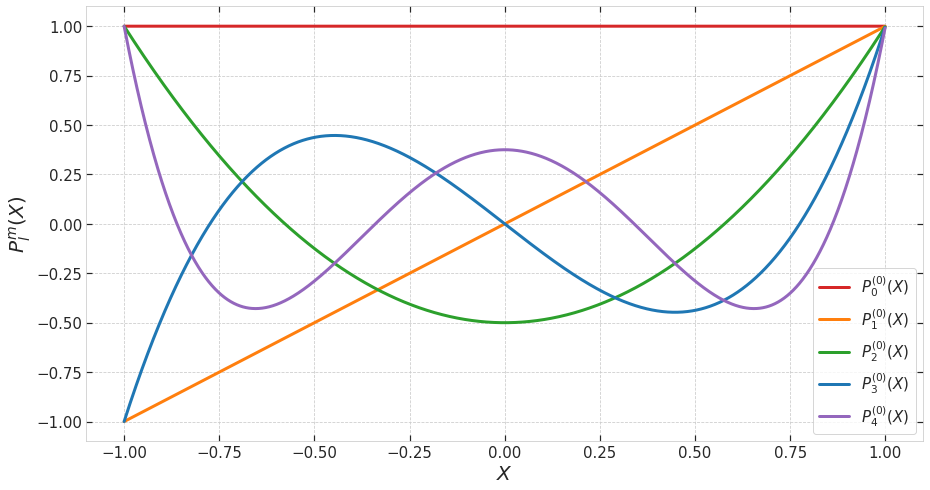

In [76]:
plot_legendre(X=X_legendre, m=0, scipy=True)

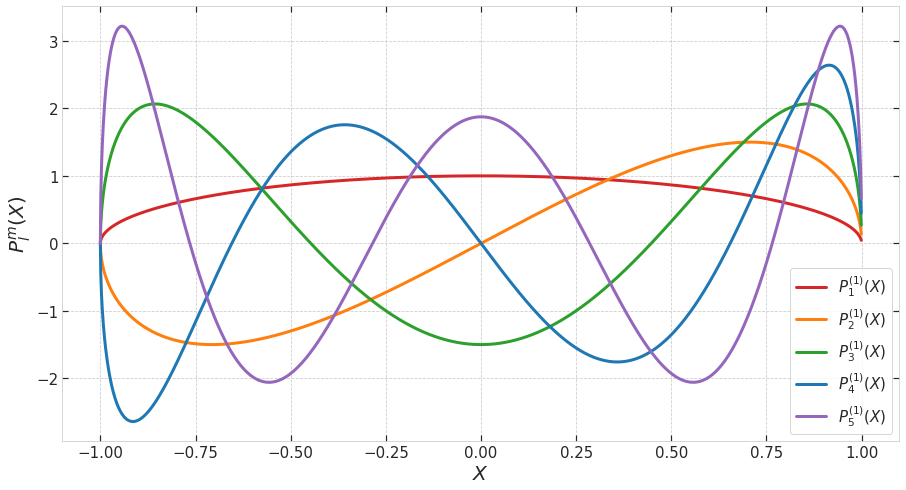

In [77]:
plot_legendre(X=X_legendre, m=1)

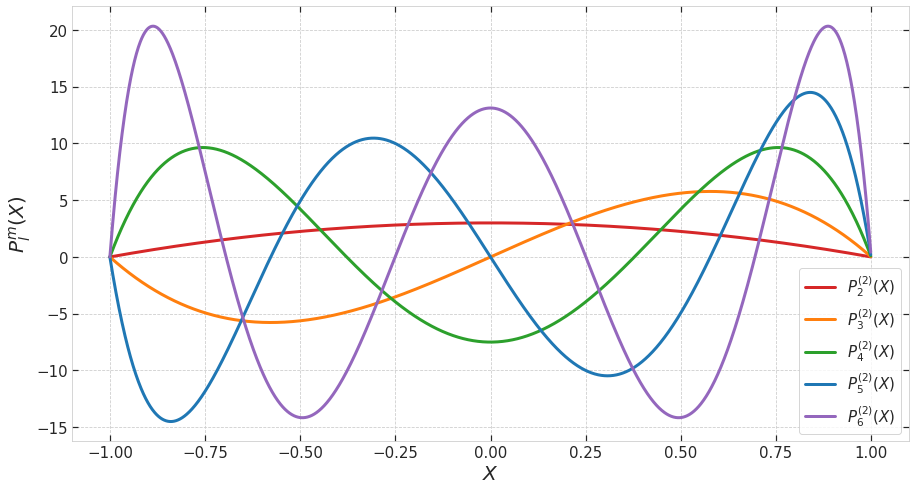

In [78]:
plot_legendre(X=X_legendre, m=2)

## Spherical harmonics

In quantum mechanics we usually define the spherical harmonics as

$$
Y_{l}^{m} \left( \vartheta, \varphi \right)
=
\left( -1 \right)^{m}
\sqrt{\frac{\left( 2l + 1 \right)}{4 \pi} \frac{\left( l - m \right)!}{\left( l + m \right)!}}
P_{l}^{m} \left( \cos \left( \vartheta \right) \right) e^{i m \varphi}
$$

In [79]:
def spherical(theta, phi, l, m):
    
    # Condon–Shortley phase
    CSP = (-1)**m
    
    # First part : The normalization factor (term with the square root)
    Y_1 = np.sqrt(((2*l + 1) * np.math.factorial(l - m))/(4 * np.pi * np.math.factorial(l + m)))
    
    # Second part : The Legendre polynomial and exponential
    Y_2 = legendre(np.cos(theta), l, m) * np.exp(1j * m * phi)
    
    return CSP * Y_1 * Y_2

In [80]:
n_points = 1000
theta = np.linspace(0, 2*np.pi, n_points)
phi = 0

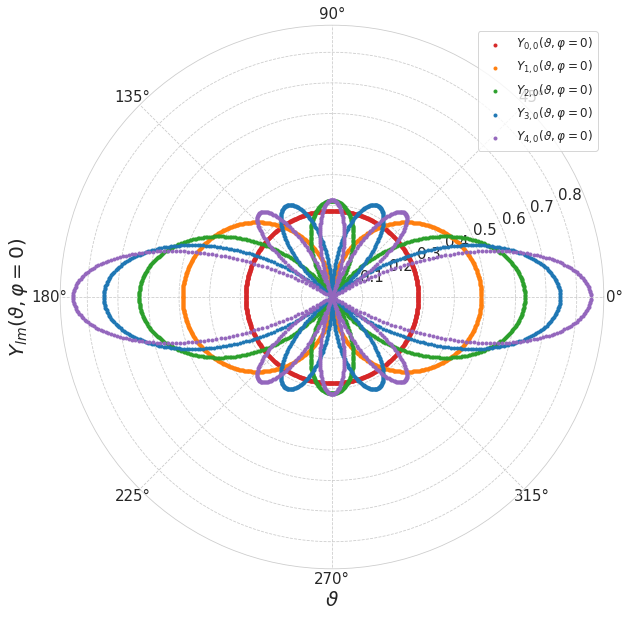

In [81]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10),
                         subplot_kw=dict(polar=True))

axisticksize = 15
axislabelsize = 20
axislegendsize = 12
scattersize = 3

m = 0
for l in range(m, m+5):
    axes.scatter(theta, np.abs(spherical(theta, phi, l=l, m=m)),
                 c=colors[l-m], s=scattersize**2, label='$Y_{%d,%d} (\\vartheta, \\varphi=0)$' % (l, m))

#axes.set_ylim(-0.1,1.1)

axes.set_xlabel('$\\vartheta$', fontsize=axislabelsize)
axes.set_ylabel('$Y_{lm} (\\vartheta, \\varphi=0)$', fontsize=axislabelsize, labelpad=30)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.savefig(out + 'Y_l_{0}-m_{1}.png'.format(l, m),
            format='png', dpi=200,
            bbox_inches='tight')

plt.show()

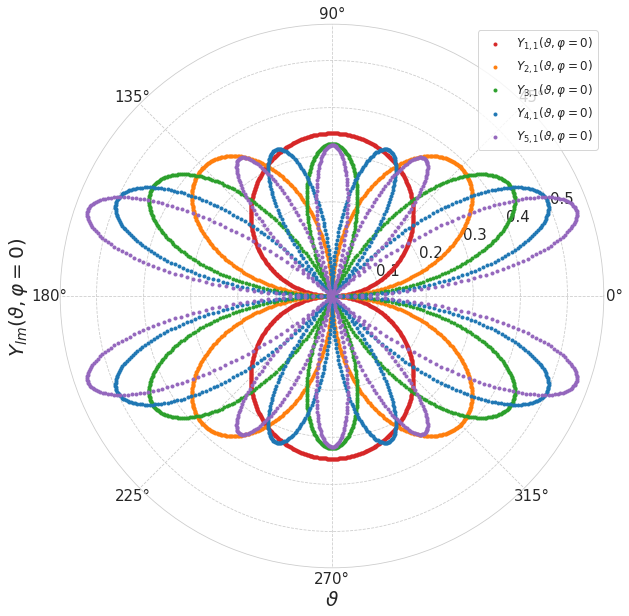

In [82]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10),
                         subplot_kw=dict(polar=True))

axisticksize = 15
axislabelsize = 20
axislegendsize = 12
scattersize = 3

m = 1
for l in range(m, m+5):
    axes.scatter(theta, np.abs(spherical(theta, phi, l=l, m=m)),
                 c=colors[l-m], s=scattersize**2, label='$Y_{%d,%d} (\\vartheta, \\varphi=0)$' % (l, m))

#axes.set_ylim(-0.1,1.1)

axes.set_xlabel('$\\vartheta$', fontsize=axislabelsize)
axes.set_ylabel('$Y_{lm} (\\vartheta, \\varphi=0)$', fontsize=axislabelsize, labelpad=30)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.savefig(out + 'Y_l_{0}-m_{1}.png'.format(l, m),
            format='png', dpi=200,
            bbox_inches='tight')

plt.show()

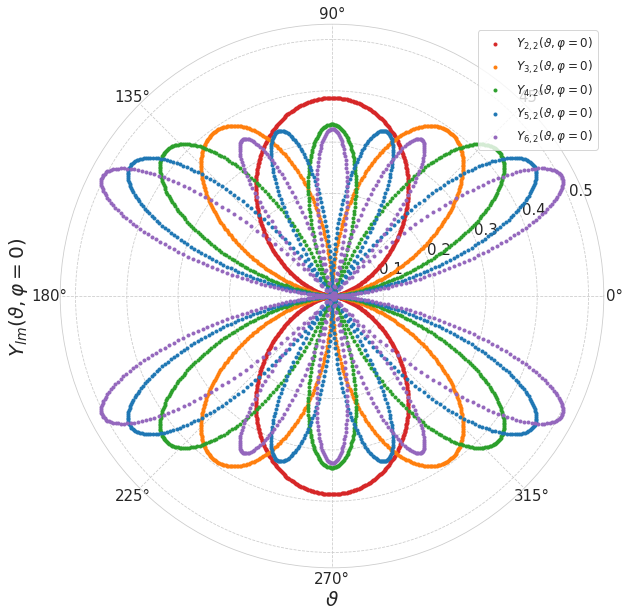

In [17]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10),
                         subplot_kw=dict(polar=True))

axisticksize = 15
axislabelsize = 20
axislegendsize = 12
scattersize = 3

m = 2
for l in range(m, m+5):
    axes.scatter(theta, np.abs(spherical(theta, phi, l=l, m=m)),
                 c=colors[l-m], s=scattersize**2, label='$Y_{%d,%d} (\\vartheta, \\varphi=0)$' % (l, m))

#axes.set_ylim(-0.1,1.1)

axes.set_xlabel('$\\vartheta$', fontsize=axislabelsize)
axes.set_ylabel('$Y_{lm} (\\vartheta, \\varphi=0)$', fontsize=axislabelsize, labelpad=30)
axes.tick_params(axis='both', which='major', labelsize=axisticksize)

axes.legend(loc='upper right', fontsize=axislegendsize)

plt.savefig(out + 'Y_l_{0}-m_{1}.png'.format(l, m),
            format='png', dpi=200,
            bbox_inches='tight')

plt.show()

## Wave function of H

By solving the radial Schrödinger equation the wave function of an arbitrary atom could be expressed as:

$$
\psi_{nlm} \left( r, \vartheta, \varphi \right)
=
R_{n,l} \left( r \right)
\cdot
Y_{l,m} \left( \vartheta, \varphi \right)
$$

Where in the case of the hydrogen atom, the $R_{n,l}$ radial part is the following
$$
R_{n,l} \left( r \right)
=
\sqrt{\left( \frac{2}{n a_{0}} \right)^{3} \frac{\left( n - l - 1 \right)!}{2n \left[ \left( n + 1 \right)! \right]}}
e^{-\rho / 2} \rho^{l} L_{n - l - 1}^{2 l + 1} \left( \rho \right)
$$

Here $\rho = 2r\ /\ \left( n a_{0} \right)$, where $a_{0} = 4 \pi \varepsilon_{0} \hbar^{2}\ /\ \left( \mu \left| q_{e} \right| \left| q_{p} \right| \right)$ is the reduced Bohr radius and $\mu$ is the reduced mass of the electron-proton system.

References:

[1] : Csanád Máté. *Atomfizika*. 2017. p.65. http://atomfizika.elte.hu/atomkvantum/files/atomfiz_vazlat.pdf

In [18]:
sns.set_style({'axes.grid': False})

In [19]:
def H_atom(XZ, n, l, m, styl=False):

    Psi = np.zeros(XZ.shape[1:])

    # 2D distances
    r = np.sqrt(XZ[0,:,:]**2 + XZ[1,:,:]**2)
    # 2D angles along x-z plane:
    #   > phi = 0
    #   > theta = arctan(dz/dx)
    # Calculate all 'theta' angles for each pixels of the grid
    phi = 0
    theta = np.zeros(XZ.shape[1:])
    for i in range(XZ.shape[1:][0]):
        for j in range(XZ.shape[1:][1]):
            dy = XZ[1,i,j]
            dx = XZ[0,i,j]
            theta[i][j] = np.arctan(dy/dx)
            # Correcting signs of theta angles
            if dx < 0:
                theta[i][j] = np.pi + theta[i][j]
            if dx > 0 and dy < 0:
                theta[i][j] = 2*np.pi + theta[i][j]

    # First part : The normalization factor (term with the square root)
    Psi_1 = np.sqrt((2/(n*a_0))**3 * np.math.factorial(n - l - 1)/(2*n*np.math.factorial(n + l)))

    # Second part : The exponential and rho^{l}
    rho = 2*r/(n*a_0)
    Psi_2 = np.exp(-rho/2) * rho**l

    # Third part : Laguerre polynomial and Spherical harmonics
    Psi_3 = laguerre(rho, alpha=2*l+1, n=n-l-1) * spherical(theta=theta, phi=phi, l=l, m=m)

    # Full wave function
    Psi = Psi_1 * Psi_2 * Psi_3
    
    # Stilizing images by multiplying pixel values
    # with an arbitrary, r-dependent constant
    if styl:
        styl = (1+r/(2*a_0))
        Psi *= styl

    return np.array(Psi)

In [20]:
def calc_A(n, l, m,
           n_points=400, dist=5e-11):
    
    X = np.linspace(-dist, dist, n_points)
    Z = np.linspace(dist, -dist, n_points)
    XZ = np.array(np.meshgrid(X, Z))

    Psi = H_atom(XZ, n=n, l=l, m=m)
    
    return np.abs(Psi/np.max(Psi))**2

In [21]:
def plot_H(n, l, m,
           n_points=400, dist=5e-11,
           axis=False, cbar=False, text=False,
           save=False):
    
    A = calc_A(n, l, m,
               n_points, dist)
    
    fig, axes = plt.subplots(figsize=(11, 11), facecolor='black',
                             subplot_kw=dict(facecolor='black'))
    axes.axis('off')

    axiscbarfontsize = 16
    axisticksize = 13
    axislabelsize = 18

    A_rot = np.transpose(A[:,::-1], axes=(1, 0))
    im = axes.imshow(A_rot, cmap='magma', vmin=0, vmax=1)

    if text:
      axes.text(x=0.8, y=0.95, s='n={0}, l={1}, m={2}'.format(n, l, m), c='white', fontsize=28,
                fontweight='demibold',
                horizontalalignment='center', verticalalignment='center', transform=axes.transAxes,
                bbox=dict(facecolor='black', alpha=0.2, lw=0))

    axes.set_xlabel('X coordinate [m]', fontsize=axislabelsize, color='white')
    axes.set_ylabel('Z coordinate [m]', fontsize=axislabelsize, color='white')
    
    # Set axis ticks as Coordinates
    axes.set_xticks(np.linspace(0, n_points, n_points+1)[::40])
    axes.set_xticklabels(['{0:.1e}'.format(i) for i in np.linspace(-dist, dist, n_points+1)[::40]])
    axes.set_yticks(np.linspace(0, n_points, n_points+1)[::40])
    axes.set_yticklabels(['{0:.1e}'.format(i) for i in np.linspace(dist, -dist, n_points+1)[::40]])
    
    axes.tick_params(axis='both', which='major', labelsize=axisticksize, colors='white')
    axes.tick_params(axis='x', which='major', rotation=42)
    
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    if cbar:
      divider = make_axes_locatable(axes)
      cax = divider.append_axes('right', size='5%', pad=0.1)
      cbar = plt.colorbar(mappable=im, cax=cax)
      cbar.ax.tick_params(labelsize=axiscbarfontsize, colors='white')

    if save:
        plt.savefig(out + 'orbit_n_{0}-l_{1}-m_{2}.png'.format(n, l, m),
                    format='png', dpi=200,
                    facecolor='black', edgecolor='black',
                    pad_inches=0)#, bbox_inches='tight')

    plt.show()

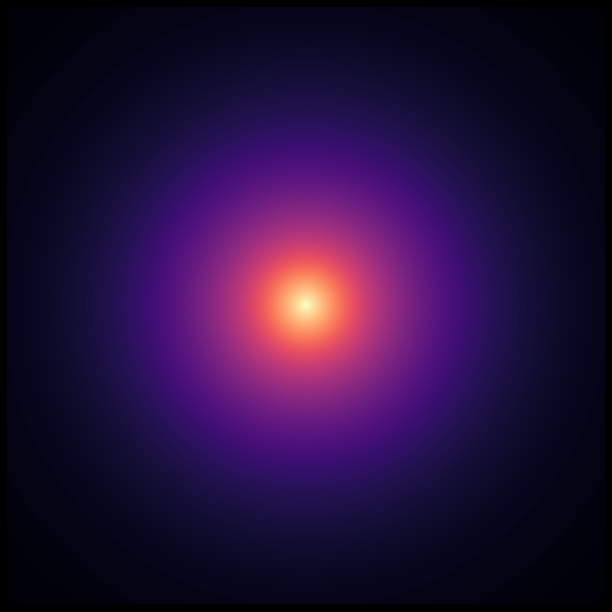

In [22]:
plot_H(n=1, l=0, m=0,
       n_points=400, dist=8e-11,
       save=True)

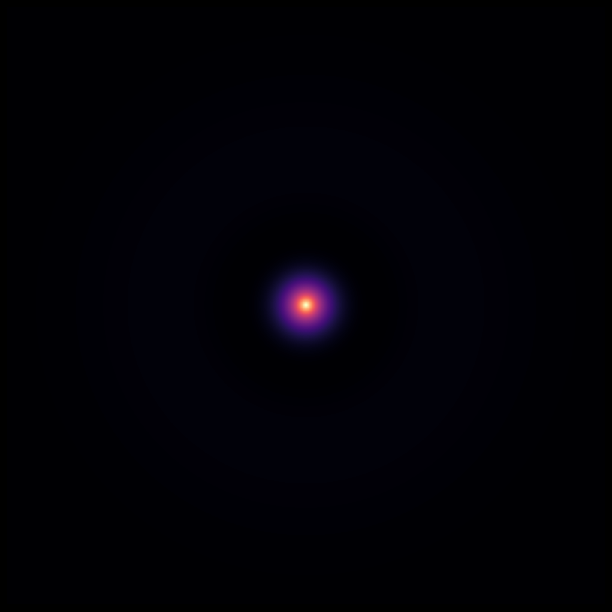

In [23]:
plot_H(n=2, l=0, m=0,
       n_points=400, dist=4.5e-10,
       save=True)

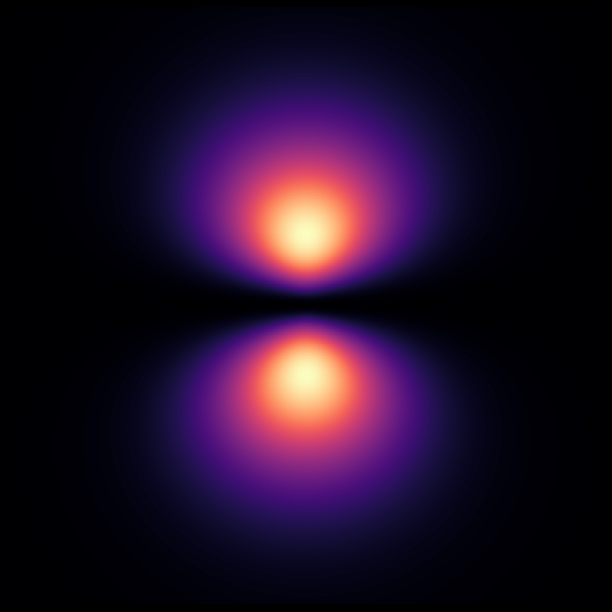

In [24]:
plot_H(n=2, l=1, m=0,
       n_points=400, dist=4.5e-10,
       save=True)

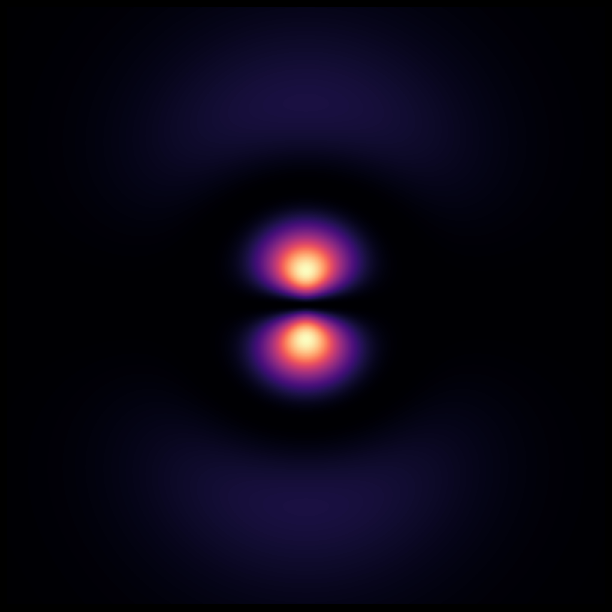

In [25]:
plot_H(n=3, l=1, m=0,
       n_points=400, dist=8e-10,
       save=True)

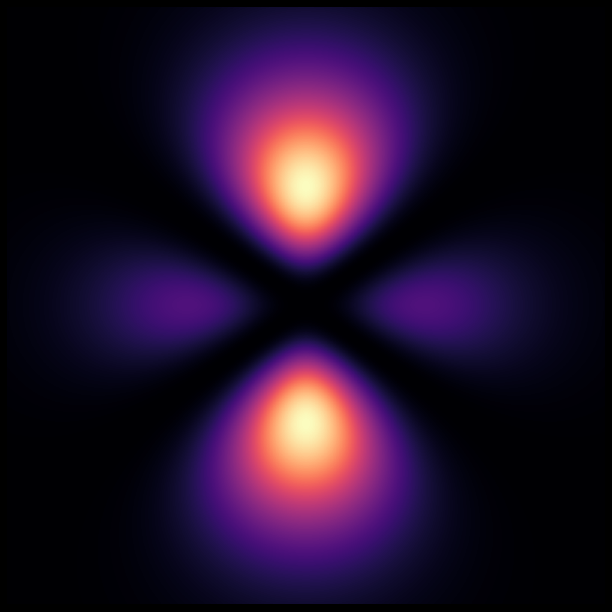

In [26]:
plot_H(n=3, l=2, m=0,
       n_points=400, dist=8e-10,
       save=True)

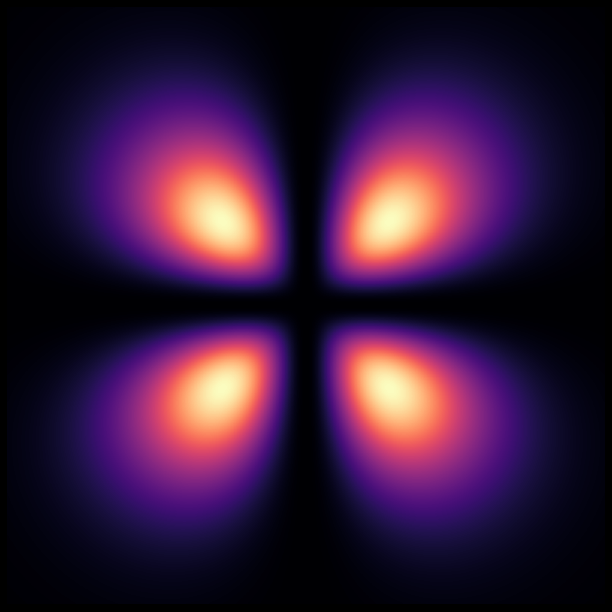

In [87]:
plot_H(n=3, l=2, m=1,
       n_points=400, dist=8e-10,
       save=True)

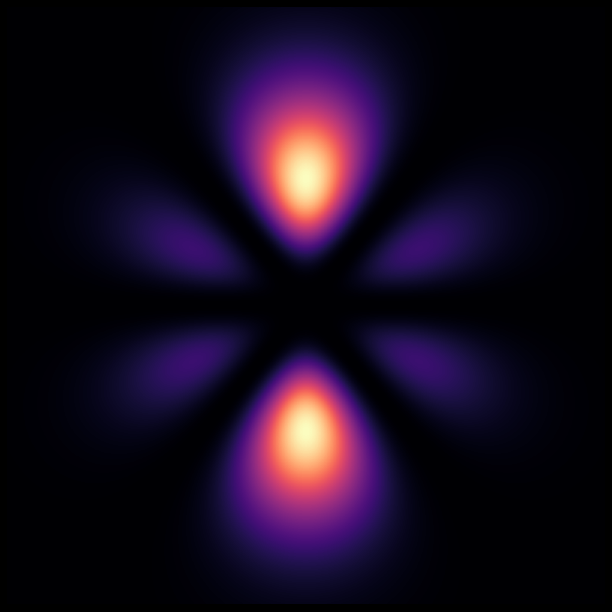

In [88]:
plot_H(n=4, l=3, m=0,
       n_points=400, dist=1.5e-9,
       save=True)

## Descriptions
### Stylized
STYLIZED versions. The pictures show the measurement probabilities of an electron in the hydrogen atom for different orbitals along the X-Z plane. "Stylized" means, that every pixel-value has been multiplied by the factor (1/(2r)), where r is the distance from the center. This highlights the outer regions, where probabilty is very small, and thus they would merge into the black background.  
The hydrogen is the simplest chemical element, which atomic form consist of a single, bounded electron and a proton. In this elementary case the Schrödinger equation has an exact solution, which could be used to describe the probability of finding the orbiting electron in a measurement at an arbitrary point in space. The solution of the Schrödinger equation called the "wave function" (denoted by the Greek letter psi: ψ) of the electron in question. In this case this ψ(r) function is only dependent on the distance vector (denoted by r) pointing to an arbitrary point in space from the proton in the center. In non-relativistic quantum mechanics the value |ψ(r)|^2 (absolute value of the wave function, squared) is interpeted as the probabilty of finding the electron at the 'r' point.

### True
TRUE versions. The pictures show the measurement probabilities of an electron in the hydrogen atom for different orbitals along the X-Z plane. "True" means, that there aren't any "trickery" to highlight fainter parts of the image, and thus they're showing the true and correct probilities.  
The hydrogen is the simplest chemical element, which atomic form consist of a single, bounded electron and a proton. In this elementary case the Schrödinger equation has an exact solution, which could be used to describe the probability of finding the orbiting electron in a measurement at an arbitrary point in space. The solution of the Schrödinger equation called the "wave function" (denoted by the Greek letter psi: ψ) of the electron in question. In this case this ψ(r) function is only dependent on the distance vector (denoted by r) pointing to an arbitrary point in space from the proton in the center. In non-relativistic quantum mechanics the value |ψ(r)|^2 (absolute value of the wave function, squared) is interpeted as the probabilty of finding the electron at the 'r' point.